# Introduction
Following various trial and error, the data pertaining to my reading habits were collated. In this project, the data will be evaluated, looking for patterns in the reading habits. 
# Overview
Prior to the evaluation and visualisation of the data, there may be aspects which may need to be modified and/or cleaned. It should be noted that some aspects of the data was also pre-cleaned in Google Sheets where the original data was recorded. 
Once this is completed, cross sections of the data can be evaluated for patters and trends in the reading habits. For instance, are there books that are more at risk of being DNFed? Are some books more likely to be reviewed?

It should be noted that this dataset contains non-English characters. This may impact certain tools and libraries. 

In [1]:
# library for data handling
import numpy as np 
import pandas as pd 

# library specific to kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

#set visualisation
%matplotlib inline
sns.set_style("whitegrid")

/kaggle/input/readinglog/reading log.csv


In [2]:
# read in data
df = pd.read_csv("/kaggle/input/readinglog/reading log.csv")

In [3]:
# examine dataset
df.head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language
0,NaN,ボッコちゃん,星 新一,315,n,2.0,Completed,Physical Book,NaN,新潮社,新潮文庫,25-May-1971,Fiction,science fiction,jp
1,12-05-20,三毛猫ホームズの推理,赤川 次郎,368,y,3.0,Completed,E-Book,Kindle,KADOKAWA,角川文庫,1-Apr-1984,Fiction,Mystery,jp
2,06-24-20,ミステリ博物館,赤川 次郎,339,n,4.0,Completed,Physical Book,NaN,KADOKAWA,角川文庫,1-Jul-1985,Fiction,Mystery,jp
3,02-28-19,Jacques the Fatalist and His Master,Denis Diderot,261,y,2.5,Completed,Physical Book,NaN,Penguin Random House,Penguin Classics,30-Jan-1986,Fiction,Humour/ Satire,jp
4,02-15-18,卒業,東野 圭吾,371,y,4.5,Completed,Physical Book,NaN,講談社,講談社文庫,8-May-1989,Fiction,Mystery,jp


In [4]:
# key information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   completion date   329 non-null    object 
 1   Title             391 non-null    object 
 2   author(s)         391 non-null    object 
 3   pages             391 non-null    int64  
 4   review            384 non-null    object 
 5   rating            345 non-null    float64
 6   status            391 non-null    object 
 7   format            391 non-null    object 
 8   platform          100 non-null    object 
 9   publisher         391 non-null    object 
 10  Imprint           391 non-null    object 
 11  publication date  391 non-null    object 
 12  type              391 non-null    object 
 13  genre             391 non-null    object 
 14  language          391 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 45.9+ KB


In [5]:
# descriptive stats of the data 
df.describe()

,pages,rating
count,391.000000,345.000000
mean,333.826087,3.576087
std,128.553393,1.057147
min,31.000000,1.000000
25%,256.000000,3.000000
50%,320.000000,4.000000
75%,384.000000,4.000000
max,912.000000,5.000000


# Evaluating the variables
There are some aspects such as title which are too unique and thus very little improvements/alterations can be made.  Therefore, focusing on more categorical variables, any errors need to be identified and minimised to ensure an effective analysis of the data. Working through the variables, the following changes were made to the data: 

* **Publication and completion date**

As these variables are dates, they can be converted from a string variable to a datetime variable. This enables the variables to be split into year and month. These new variables should prove to be insightful when examining fluctuations over time. 

In [6]:
# amend publication dates
df['publication date'] = pd.to_datetime(df['publication date'])
df['publication_year'] = df['publication date'].dt.year
df['publication_month'] = df['publication date'].dt.month

# amend completion dates
df['completion date'] = pd.to_datetime(df['completion date'])
df['completion_year'] = df['completion date'].dt.year
df['completion_month'] = df['completion date'].dt.month

It should be noted that there are 62 books where there are no completion dates available. Unless the status indicates that the book was "DNF" (did not complete), the majority of books were read before 2016 or were not logged as read in an appropriate time frame.  In total there are 53 such non-DNF books. 

In [7]:
# number of entries with no completion date (includes DNF and unknow completion date books)
print("There are", sum(df["completion date"].isnull()), "books with no completion date.")

# number of books where completion date unknow 
print("Of this,", df[(df["completion date"].isnull())& (df["status"]=="Completed")].shape[0], "books are marked as read (ie read with no completion date).")

There are 62 books with no completion date.
Of this, 53 books are marked as read (ie read with no completion date).


In [8]:
# extract of completed books where date of completion unknown
df[(df["completion date"].isnull())& (df["status"]=="Completed")].head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language,publication_year,publication_month,completion_year,completion_month
0,NaT,ボッコちゃん,星 新一,315,n,2.0,Completed,Physical Book,NaN,新潮社,新潮文庫,1971-05-25,Fiction,science fiction,jp,1971,5,NaN,NaN
6,NaT,注文の多い料理店,宮沢 賢治,358,n,NaN,Completed,Physical Book,NaN,新潮社,新潮文庫,1990-05-29,Fiction,Fantasy,jp,1990,5,NaN,NaN
21,NaT,どちらかが彼女を殺した,東野 圭吾,356,y,5.0,Completed,Physical Book,NaN,講談社,講談社文庫,1999-05-14,Fiction,Mystery,jp,1999,5,NaN,NaN
25,NaT,悪意,東野 圭吾,376,y,5.0,Completed,Physical Book,NaN,講談社,講談社文庫,2001-01-17,Fiction,Mystery,jp,2001,1,NaN,NaN
26,NaT,A Study in Scarlet & The Sign of the Four,Sir Arthur Conan Doyle,224,n,4.0,Completed,Physical Book,NaN,Wordsworth Editions,Wordsworth Editions,2001-12-05,Fiction,Mystery,eng,2001,12,NaN,NaN


* **Review** 

A relatively straight forward variable indicating if a book had a review ("y"), or not ("n"). For improved readability the variables can be revised to  "yes" and "no".  

In [9]:
# update review column responses
df["review"].replace({"y": "Yes", "n":"No"}, inplace = True)
df["review"].head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: review, dtype: object

* **Platform**

This variable indicates the method by which E-books and Audiobooks were consumed. BorrowBox 
 and Libby are library run services that enable users to borrow and read books.  

In [10]:
# distribution of platform types
df["platform"].value_counts()

Audible      25
Libby        25
BorrowBox    24
Kindle       17
Unknown       9
Name: platform, dtype: int64

* **Genre** 

There are 36 genres in the dataset and an overview of the variable indicates that there are no major issues. However, there are genres listed in Japanese. Based on previous trails, libraries such as matplotlib may struggle with the Japanese characters. Therefore, for such variables the plotly visualisation will need to be used. 

In [11]:
# number of unique genres
print("There are",df["genre"].nunique(),"genres in this dataset.")

There are 36 genres in this dataset.


In [12]:
# list of genres
df["genre"].unique()

array(['science fiction', 'Mystery', 'Humour/ Satire', 'Literary Fiction',
       'Fantasy', 'Romance', 'Science Fiction', 'Bildungsroman',
       'Self Help', 'Picture book', 'Magical realism', 'Thriller',
       'Economics', 'Horror', 'Contemporary', 'Mathematics',
       'Self-Esteem', '経済小説', 'Dystopian', 'science', '経営書', 'Psychology',
       '仕事小説', 'Fashion', 'Humour Encyclopaedias', 'Realist Literature',
       'Physical Chemistry', 'Data', 'Law', 'Business', 'Adventure',
       'Applied Physics', 'History', 'Biographies',
       'Essays, Journals & Letters', 'Architectural History'],
      dtype=object)

* **Language** 

Codes "jp" and "eng" are used in this variable to represent whether the language of the book was Japanese or English as I read books in both languages. Similar to review, for clarity, they are updated to "Japanese" and "English" respectively. 

In [13]:
# view data in language column
df["language"].unique()

array(['jp', 'eng'], dtype=object)

In [14]:
# update language variables to Japanese and English for clarity
df["language"].replace({"jp": "Japanese", "eng":"English"}, inplace = True)

* **Status** 

As incomplete and TBR are relatively similar and small categories on their own they could be merged to one, "Other".  

In [15]:
# view distrubution of status
df["status"].value_counts()

Completed     381
DNF             8
Incomplete      1
TBR             1
Name: status, dtype: int64

In [16]:
# Merge Incomplete and TBR to other
df["status"].replace({"Incomplete": "Other", "TBR": "Other"}, inplace = True)

* **Type**

Type, on face value, appears to not have any issues. 

In [17]:
# view data in type
df["type"].value_counts()

Fiction       341
Nonfiction     50
Name: type, dtype: int64

# EDA & Visualisation
For EDA and visualisation, there are a few aspects which are intriguing. One aspect is the books classed as either "DNF" or "Completed". However, as dates are missing for some completed books, a subgroup of books read but no completion date should also be examined separately. 

As "Other" remains a small group, it is likely that insights from this group will be extremely limited. In addition, it is likely that there are a number of missing books that are not logged as TBR. 

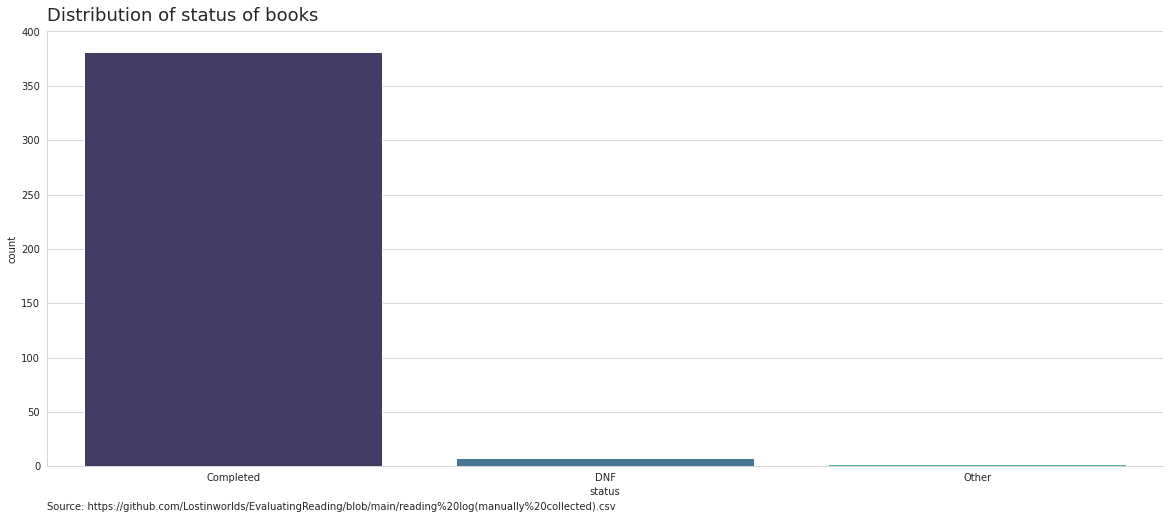

In [18]:
# visualisation of status data for the whole dataset

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "status", data = df, palette = "mako")

# format graph
plt.title("Distribution of status of books", size = 18, loc = "left", y = 1.01)
plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [19]:
# separate data to DNF and completed (note there are "others")
DNF = df[df["status"]=="DNF"]
Completed = df[df["status"]=="Completed"]

## DNF

Although, I typically aim to avoid giving up on a book, this list is also not a comprehensive list of books that have been side-lined. That being said, in this dataset, DNF includes 8 books, 7 audiobooks and 1 physical book, and applies to over 2,375 pages. 

In [20]:
# format of DNF books
DNF["format"].value_counts()

Audiobook        7
Physical Book    1
Name: format, dtype: int64

In [21]:
# number of DNF pages
print(sum(DNF["pages"]), "pages are DNF")

2375 pages are DNF


There are no specific authors, publishers or imprints whose books appear on this list several times. Therefore, no inference can be made about authors that are disliked or unenjoyable. However, it may be that my reluctance to DNF and missing data are blurring the realities.  

In [22]:
# confirm whether there are duplicated authors in the DNF data
if DNF["author(s)"].nunique() ==DNF.shape[0]:
    print("There are",DNF["author(s)"].nunique(), "authors and no duplicated authors.")
else:
    print("There are",DNF["author(s)"].nunique(),"authors and include duplicates. You may wish to avoid some authors.")

There are 8 authors and no duplicated authors.


In [23]:
# confirm whether there are duplicated publishers in the DNF data

if DNF["publisher"].nunique() ==DNF.shape[0]:
    print("There are",DNF["publisher"].nunique(), "publishers and no duplicates.")
else:
    print("There are",DNF["publisher"].nunique(),"publishers and include duplicates. You may wish to avoid some publishers.")

There are 8 publishers and no duplicates.


In [24]:
# confirm whether there are duplicated imprints in the DNF data

if DNF["Imprint"].nunique() ==DNF.shape[0]:
    print("There are",DNF["Imprint"].nunique(), "imprints and no duplicates.")
else:
    print("There are",DNF["Imprint"].nunique(),"imprints and include duplicates. You may wish to avoid some imprints.")

There are 8 imprints and no duplicates.


Books secured via the library audiobook service, BorrowBox, is more prone to DNFs. However, this is an extremely narrow margin, beating Libby and Audible by only one book. Library books have a relatively low cost margin for DNF compared to a physical books and even Audible books which may be contributing to the higher rate of DNF.  

In [25]:
# review how the DNF audiobooks were consumed
DNF[DNF["format"]=="Audiobook"]["platform"].value_counts()

BorrowBox    3
Audible      2
Libby        2
Name: platform, dtype: int64

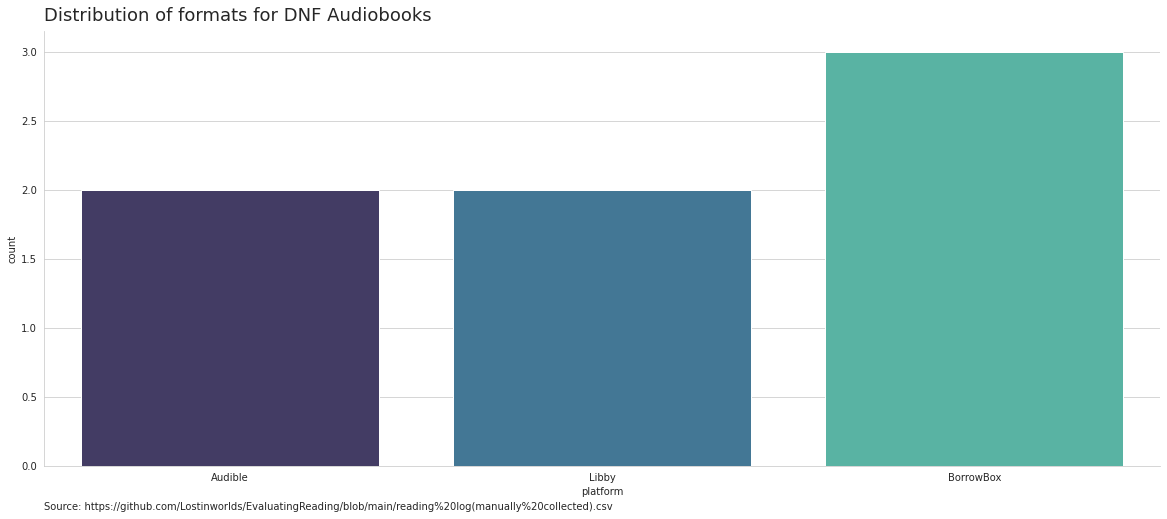

In [26]:
plt.figure(figsize = (20,8))
sns.countplot(x = "platform", data = DNF[DNF["format"]=="Audiobook"], palette = "mako")

plt.title("Distribution of formats for DNF Audiobooks", size = 18, loc = "left", y = 1.01)
plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

Books more likely to be dropped appear to have been published relatively recently, 2005-2022.These include 3 books published between 2015 and 2019. As for month of publication, books published in latter half of the year are particularly porn to DNF. 

In [27]:
# distribution of publication data (year) for DNF book

# create graph
fig = px.histogram(DNF, x = "publication_year", nbins=5, title = "Distribution of publication date (year)")

# format graph
fig.update_layout({ "plot_bgcolor" : "rgba(0,0,0,0)",
                  "paper_bgcolor": "rgba(0,0,0,0)"})

fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")
fig.add_annotation(text = ("Publication data for books which were DNF. <br>Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"),
                   showarrow = False, x = 0, y = -.20,
                   xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom", xshift = -1, yshift = -5, font = dict(size =10, color = "grey"), align = "left")
fig.show()

In [28]:
# distribution of publication data (month) for DNF book

# create graph
fig = px.histogram(DNF, x = "publication_month", nbins=4, title = "Distribution of publication date (month)")

# format graph
fig.update_layout(xaxis_range = [1,12])
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})

fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text= ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"),
                  showarrow = False, x = 0, y = -.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom", 
                  xshift =-1, yshift = -5, font = dict(size = 10, color = "grey"), align = "left")

Genres self-helps and to a latter extent literary fiction, are the most susceptible to DNF. This suggests that there is more pronounced preference in the books offered by these genres.

In [29]:
# distribution of genre for DNF books

# create graph
fig = px.histogram(DNF, x = "genre", title = "Distribution of genres in the DNF books")

# format graph
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), 
                   showarrow= False, x = 0, y = -.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom", 
                  xshift =-1, yshift = -5, font = dict(size = 10, color = "grey"), align = "left")
fig.show()

## Completion date unknown

As stated previously, there are 53 books which were read but no completion date was recorded. Of these, the majority were in Japanese. The most prominent authors including  藤崎 都, 東野 圭吾 and 日丸屋 秀和. It should be noted that whilst 藤崎 都 and 東野 圭吾 were authors of books, 日丸屋 秀和 is a [mangaka](https://en.wikipedia.org/wiki/Manga_artist#:~:text=A%20manga%20artist%20(or%20mangaka,artists%20were%20working%20in%20Japan.). This interplay between books and manga will be discussed later as manga are frequently serialised. 

In [30]:
# extract books read but with no completion date
completion_date_unknown = Completed[Completed["completion date"].isnull()]

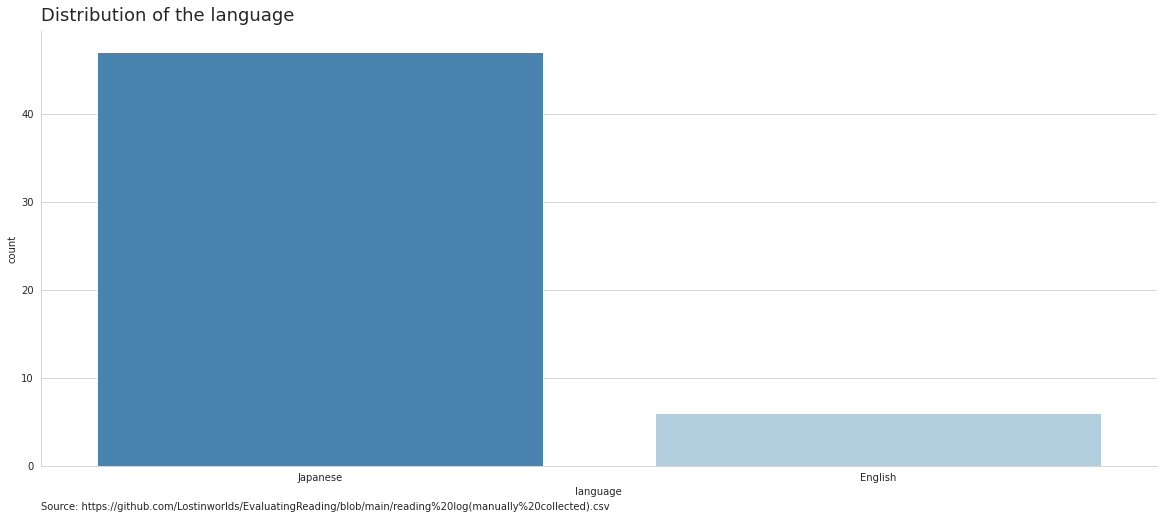

In [31]:
# view distribution of language in the dataset

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "language", data = completion_date_unknown, palette = "Blues_r")

# format graph
plt.title("Distribution of the language",size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [32]:
# Top 10 authors for books read but have no recorded completion date
completion_date_unknown["author(s)"].value_counts().head(10)

藤崎 都                      6
東野 圭吾                     6
日丸屋 秀和                    6
三上 延                      4
谷 瑞恵                      3
伊坂 幸太郎                    3
葉山 透                      2
Sir Arthur Conan Doyle    2
朝霧 カフカ                    2
川村 元気                     1
Name: author(s), dtype: int64

In [33]:
# visualisation of authors for books read but have no recorded completion date

# create graph
fig = px.histogram( completion_date_unknown, x = "author(s)", title = "Popular authors")

# format graph
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

In addition, a high proportion, 79.3% , of the books consumed were via physical books. Only one book was consumed via audiobook. 

In [34]:
# How were the books by the most popular authors consumed
Book_format = completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")]["format"].unique()
if len(Book_format) ==1: 
    print("The books by the most popular authors were consumed as a", "{}{}".format(Book_format[0].lower(),"."))
else: 
    print("The books by the most popular authors were consumed as a",Book_format)

The books by the most popular authors were consumed as a physical book.


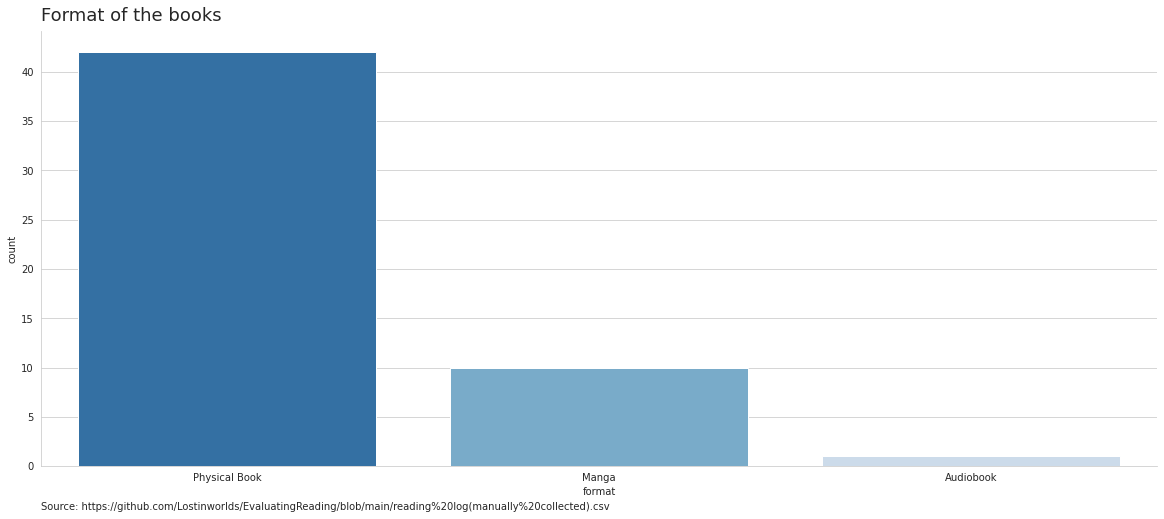

In [35]:
# distribution of formats throughout the books read with no completion date

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "format", data = completion_date_unknown, palette = "Blues_r")

# format graph
plt.title("Format of the books", size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [36]:
percent = round(((completion_date_unknown[completion_date_unknown["format"]== "Physical Book"].shape[0]/completion_date_unknown.shape[0])*100), 2)
print("{}{}".format(percent,"% of books with no completion date were consumed as a physical book."))

79.25% of books with no completion date were consumed as a physical book.


In [37]:
# information of the book with no completion date consumed as an audiobook
completion_date_unknown[completion_date_unknown["format"]== "Audiobook"]

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language,publication_year,publication_month,completion_year,completion_month
349,NaT,どうしても生きてる,朝井 リョウ,323,Yes,4.0,Completed,Audiobook,Audible,幻冬舎,幻冬舎文庫,2019-10-10,Fiction,Contemporary,Japanese,2019,10,NaN,NaN


The most popular imprint in this collection is メディアワークス文庫. However, interestingly, the authors previously singled out do not publish under this imprint. Going one level up, the list of popular publishers aligns with the publishers used by the favoured authors.  

In [38]:
# Imprints of books with no completion date

# create graph
fig = px.histogram( completion_date_unknown, x = "Imprint", title = "Distribution of imprints")

# format graph
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")


In [39]:
# imprints of favoured authors
imprints = completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")|(completion_date_unknown["author(s)"] =="日丸屋 秀和")]["Imprint"].unique()

print("For the popular authors in the list of read books with no completion date, their books were published via the following imprints:",*imprints, sep= ", ")

For the popular authors in the list of read books with no completion date, their books were published via the following imprints:, 講談社文庫, 幻冬舎コミックス, 角川ルビー文庫, 文春文庫, 集英社文庫


In [40]:
# distribution of publishers for books with no completion date

# create graph
fig = px.histogram( completion_date_unknown, x = "publisher", title = "Publishers of books")

# format graph
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")


In [41]:
# publisher of favoured authors
publisher = completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")|(completion_date_unknown["author(s)"] =="日丸屋 秀和")]["publisher"].unique()

print("For the popular authors in the list of read books with no completion date, their books were published by:",*publisher, sep= ", ")

For the popular authors in the list of read books with no completion date, their books were published by:, 講談社, 幻冬舎, KADOKAWA, 文藝春秋, 集英社


All the read books with no completion date are fiction and the main four genres enjoyed consisted of fantasy, mystery, romance and humour. 

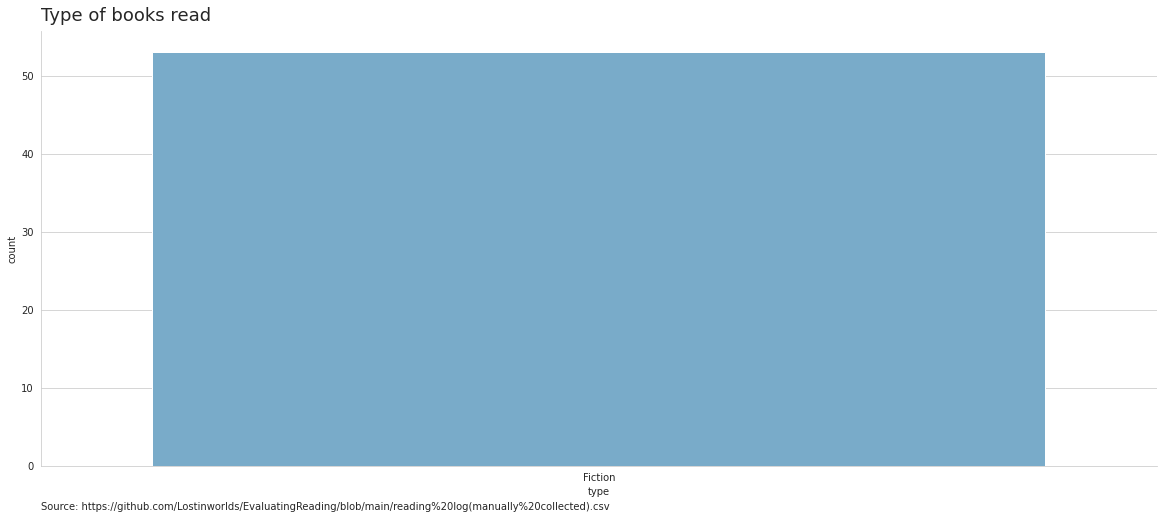

In [42]:
# type of books which were included in the books with no completion date

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "type", data = completion_date_unknown, palette = "Blues_r" )

# format graph
plt.title("Type of books read",size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

All the read books with no completion date are fiction and the main four genres enjoyed consisted of fantasy, mystery, romance and humour. 

In [43]:
# genre of books with no completion date

# create graph
fig = px.histogram( completion_date_unknown, x = "genre", title = "Genre of books")

# format graph
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")


The majority of the books for which completion date is unclear were published between 2011 and 2014. 

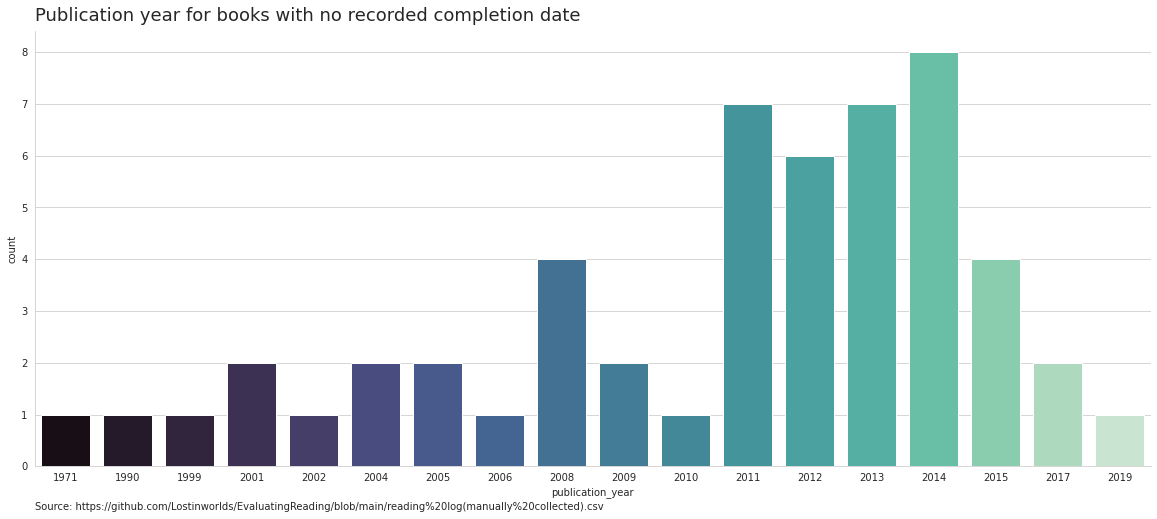

In [44]:
# year of publication of books with no completion date

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "publication_year", data = completion_date_unknown, palette = "mako")

# format graph
plt.title("Publication year for books with no recorded completion date", size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In terms of reviews and ratings, the majority of the books do not have a review. However, 64.2% of the books in this category have ratings. These ratings centre around 3-5, with the majority of the books centring upon 4. This is understandable as books that are unenjoyable will typically not be read or completed whilst the top rate of 5 will be given to particularly exceptional books.  

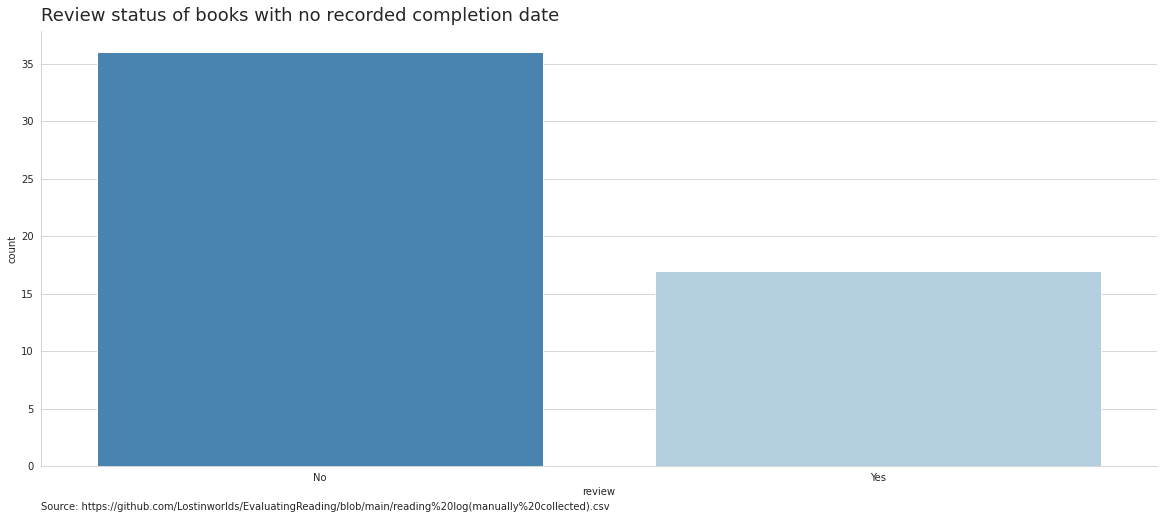

In [45]:
# review status of books with no completion date

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "review", data = completion_date_unknown,palette = "Blues_r")

# format graph
plt.title("Review status of books with no recorded completion date",size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [46]:
# calculate the % of reviews in the data

reviews = round((1-(completion_date_unknown["rating"].isnull().sum()/completion_date_unknown.shape[0]))*100,2)

# output as sentence
print("{}{}".format(reviews,"% of books with no completion date have a rating."))

64.15% of books with no completion date have a rating.


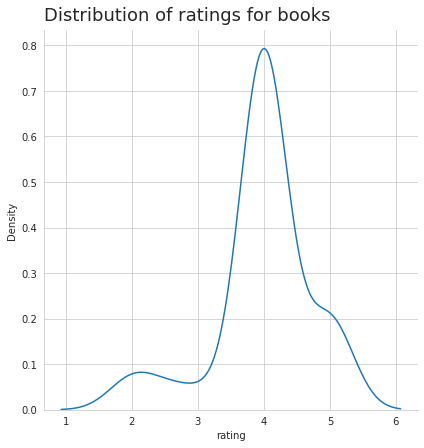

In [47]:
# kde distribution of ratings for books with no completion date

# create graph
sns.displot(x = "rating", data = completion_date_unknown, kind= "kde", height = 6)

# format graph
plt.title("Distribution of ratings for books", fontsize = 18, loc = "left", y = 1.01)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [48]:
print(completion_date_unknown["rating"].max(), "is the highest rating book for which no completion date was included.")

5.0 is the highest rating book for which no completion date was included.


## Completed books
Finally, the books which were read and a completion date is available. For this cross section of the data, May 2018 and 2020 had the highest page count (highest number of pages read). 

In [49]:
# exclude completed books with no completion date
Completed = Completed.dropna(subset = ["completion date"])

In [50]:
# distribution of completion dates and the pages read

# create graph
fig = px.bar( Completed, x= "completion date", y = "pages", title = "No. of pages read")

# format graph
fig.update_layout(yaxis_range = [0,1150])

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-5, font = dict(size = 10, color = "grey"), align = "left")

Examining the completion years, the number of pages read rose from 2017 and peaked in peaked in 2020. One aspect that is likely to be affecting this is the targets I had to read 25 pages and the increasing to 50 and finally to 100 pages a day between these period. Sadly the final goal was never achieved as my lifestyle shifted significantly during COVID and with no commute time for reading was reduced. Interestingly when the number of books is explored the picture changes significantly. A relatively fewer books were read in 2019 compared to the preceding years. This is due to longer books taking more time to read and therefore number of books read overall is hampered. 

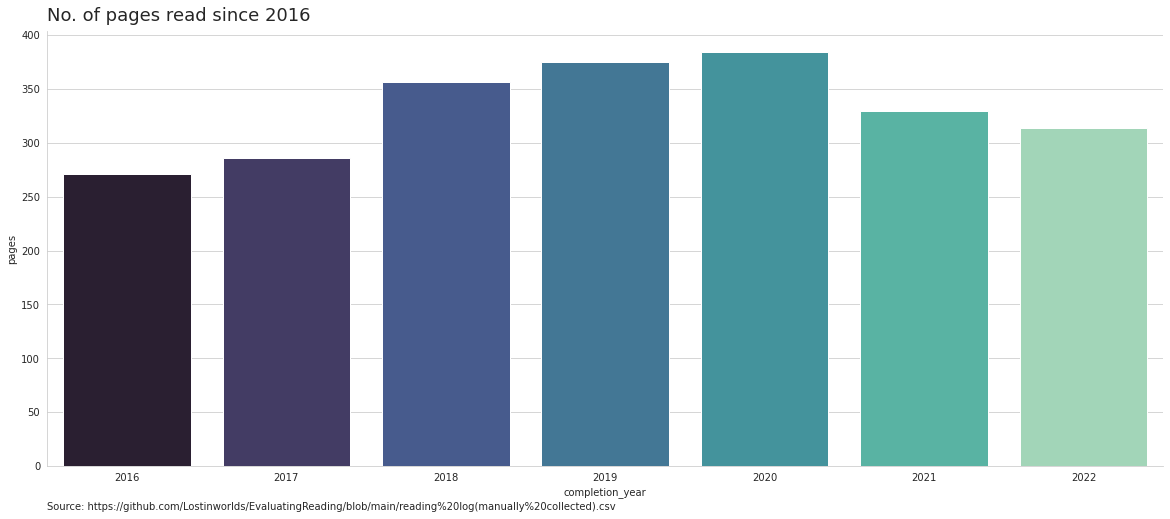

In [51]:
# Number of pages read since 2016 to 2022

# create graph
plt.figure(figsize = (20,8))
sns.barplot( x= Completed["completion_year"].astype("int"), y = "pages", data = Completed, ci = None, palette = "mako")

# format graph
plt.title("No. of pages read since 2016", size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

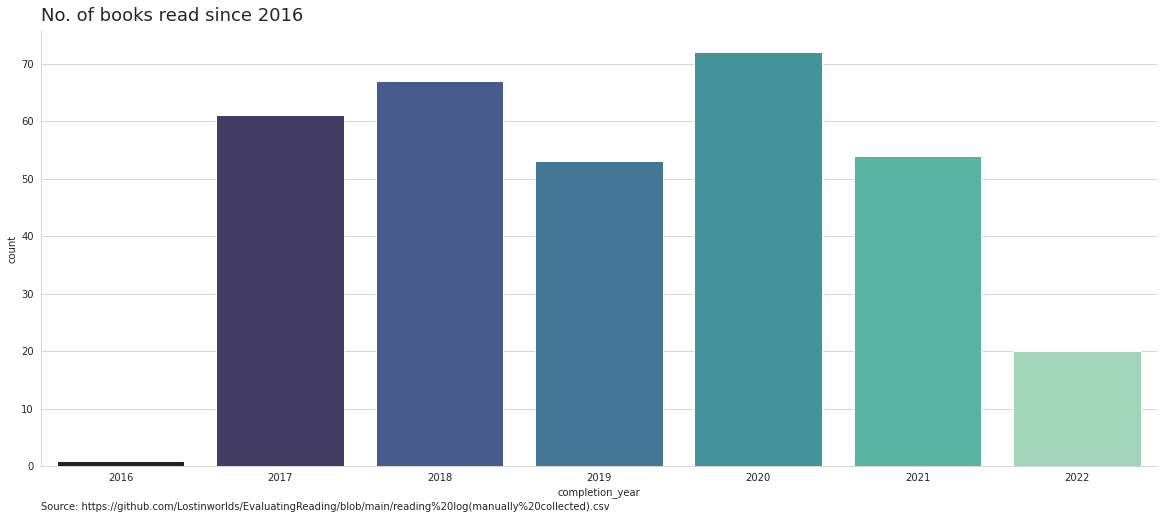

In [52]:
# Number of books read since 2017

# create graph
plt.figure(figsize = (20,8))
sns.countplot( x= Completed["completion_year"].astype("int"),data = Completed, palette = "mako")

# format graph
plt.title("No. of books read since 2016",size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In terms of months, there are clearly some months were more pages are read, March, July, Nov and Dec. Typically more books are consumed during the winter as I attempt to ensure that I have achieved my reading goal. As for March and July, it may be that these months are less hectic and therefore more reading is possible. 

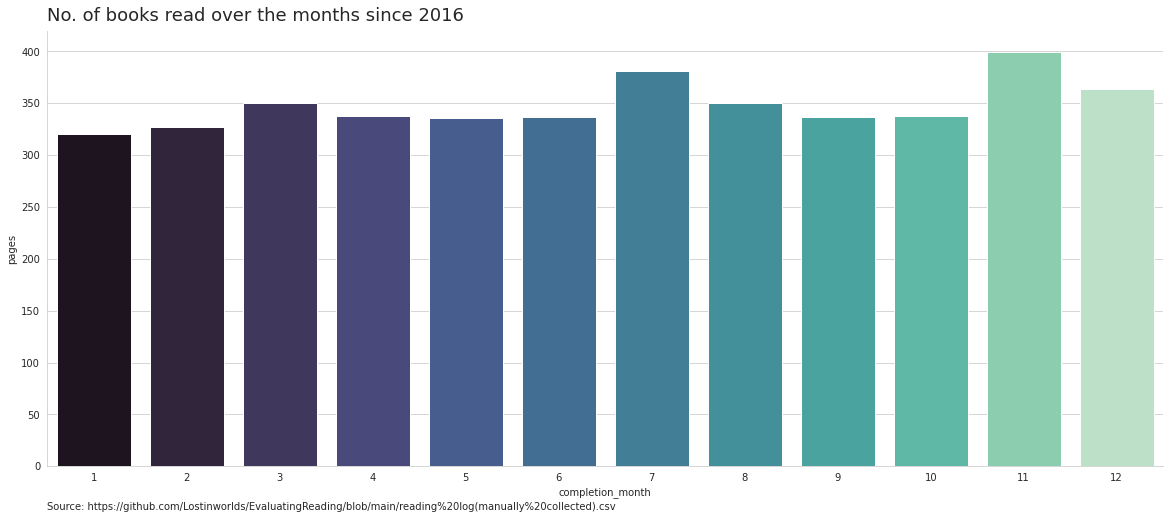

In [53]:
# Number of books read in various months

# create graph
plt.figure(figsize = (20,8))
sns.barplot( x= Completed["completion_month"].astype("int"), y = "pages", data = Completed,ci = None, palette = "mako")

# format graph
plt.title("No. of books read over the months since 2016",size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

However,  looking at books read over both month and year, the pattern appears to become less clear. It suggests more books are consumed in the early and later part of the year. However, after some consideration, this pattern may be explained in the following manner: 

    As with most individuals, in the new year, the drive to read more books leads to a higher rate of books completed. However as stresses, issues and loss of motivation strikes, less books are consumed. Finally as the year nears its end, there is a new found motivation to achieve the goal outlined at the start of the year, which in turn pushes the number of books read up.

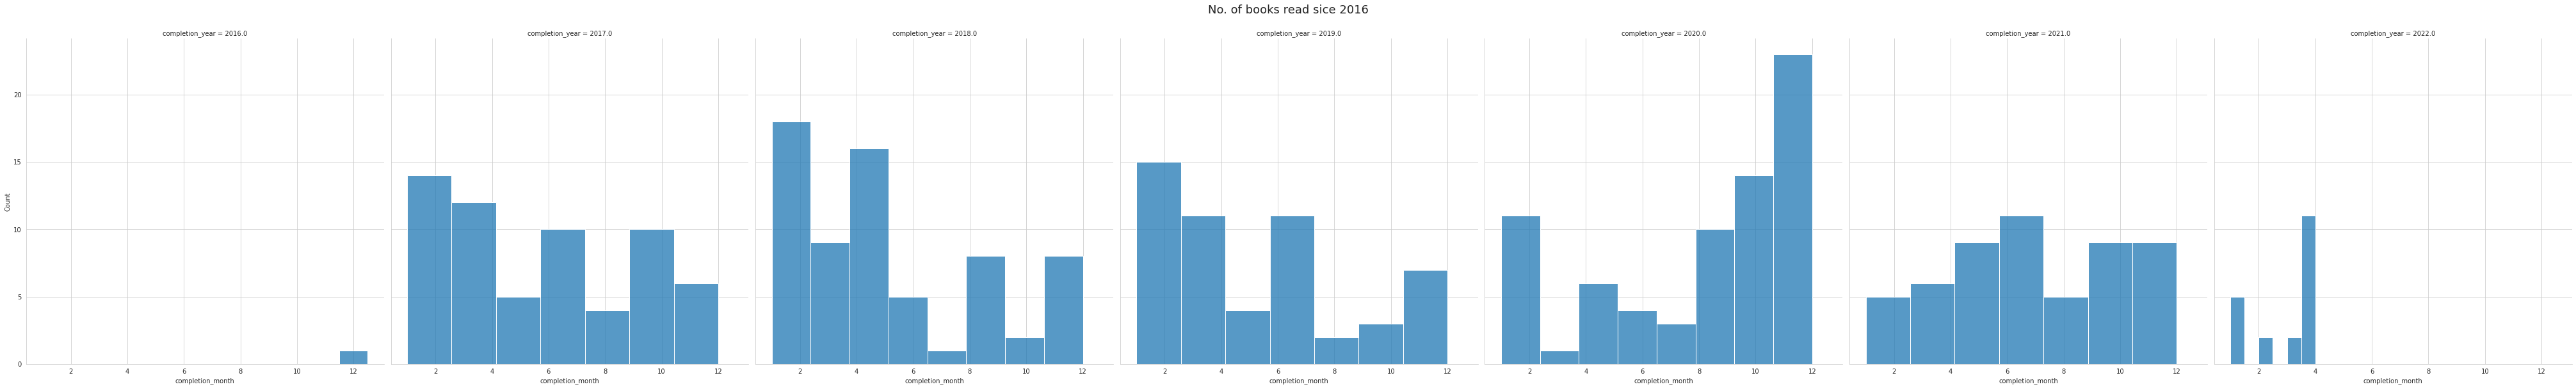

In [54]:
g = sns.FacetGrid(Completed, col='completion_year', height=8)
g.map(sns.histplot, "completion_month",)

# format graph
plt.suptitle("No. of books read sice 2016",size = 18, y = 1.05)
plt.show()

As pages and books are different variables it does not follow this patter. However, the peaks in the page count in later months may be a reflection of the drive to achieve reading goal. On the other hand the peaks earlier in the year could be the trigger of slumps and reduced reading overall in the month. 

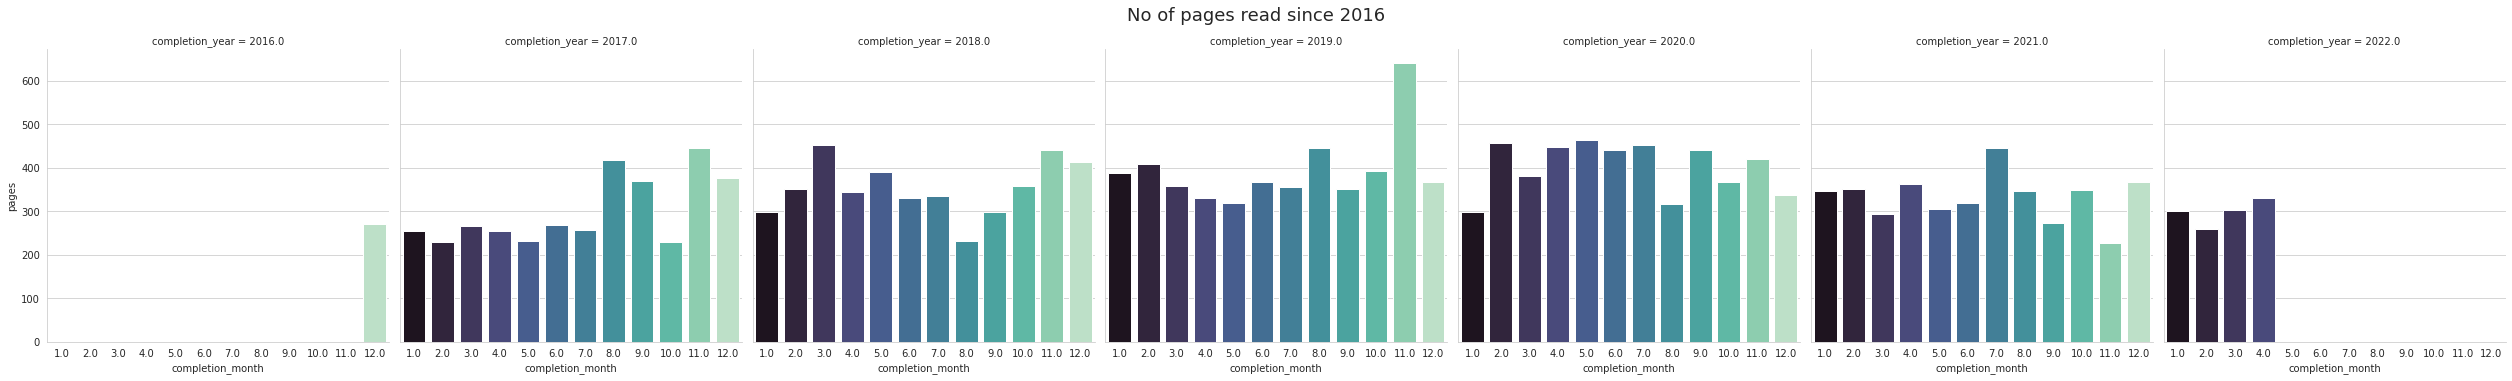

In [55]:
# fluctuations in the number of pages read over time

# create graph
sns.catplot(data = Completed, x="completion_month", y = "pages", col = "completion_year", kind = "bar",ci = None, palette = "mako")
# format graph

plt.suptitle("No of pages read since 2016",size = 18, y = 1.05)
plt.show()

Pivoting the attention to titles, there are 317 books in this slice and include 13 which have been read twice. The number of rereads account for 3.35% of the books which have been read. This is relatively low as I tend to avoid rereads. 

In [56]:
print("There are", Completed["Title"].nunique(), "unique titles.")

There are 317 unique titles.


In [57]:
# list of rereads
rereads = df["Title"].value_counts().rename_axis ("titles").reset_index(name = "reads")
rereads[rereads["reads"]>1].head()

,titles,reads
0,ぼくは明日、昨日のきみとデートする,2
1,Economics: The User's Guide,2
2,Economics,2
3,Magpie Murders,2
4,妖怪アパートの幽雅な日常 1,2


In [58]:
print(rereads[rereads["reads"]>1].shape[0], "of books were reread.")
print("This accounts to", round((1 -Completed["Title"].nunique()/Completed.shape[0])*100,2), "% of books with a recorded completion date.")

13 of books were reread.
This accounts to 3.35 % of books with a recorded completion date.


Where the completion date is know, for 44 authors more than one book by them has been read. The most popular authors were 東野 圭吾 (15 books), 谷 瑞恵 (13 books) and 香月 日輪 (8 books). Once again these are Japanese authors. Examining the authors where more than two book was read, a high number of books appear to belong to Japanese authors. To be specific, Japanese books account for 66.42% of the books. However, interestingly, in terms of pages, English books out performed Japanese books. 

In [59]:
# exclude reread entries
first_reads = Completed.drop_duplicates(subset = ["Title"], keep = "first"  )

# find the most popular author in the remaining list of books. 
fav_authors = first_reads["author(s)"].value_counts().rename_axis ("author(s)").reset_index(name = "books/reads")

# Number of authors, for whome more than one book was read. 
fav_authors[fav_authors["books/reads"]>1].shape[0]

44

In [60]:
# top 10 authors with most number of books read
fav_authors[fav_authors["books/reads"]>1].head()

,author(s),books/reads
0,東野 圭吾,15
1,谷 瑞恵,13
2,香月 日輪,8
3,伊坂 幸太郎,7
4,ふじた,6


In [61]:
# popular authors for whom more than 2 books were read. 

# create graph
fig = px.bar(fav_authors[fav_authors["books/reads"]>2], x="author(s)", y = "books/reads", title = "Authors and No. of books" )

# format graph
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")


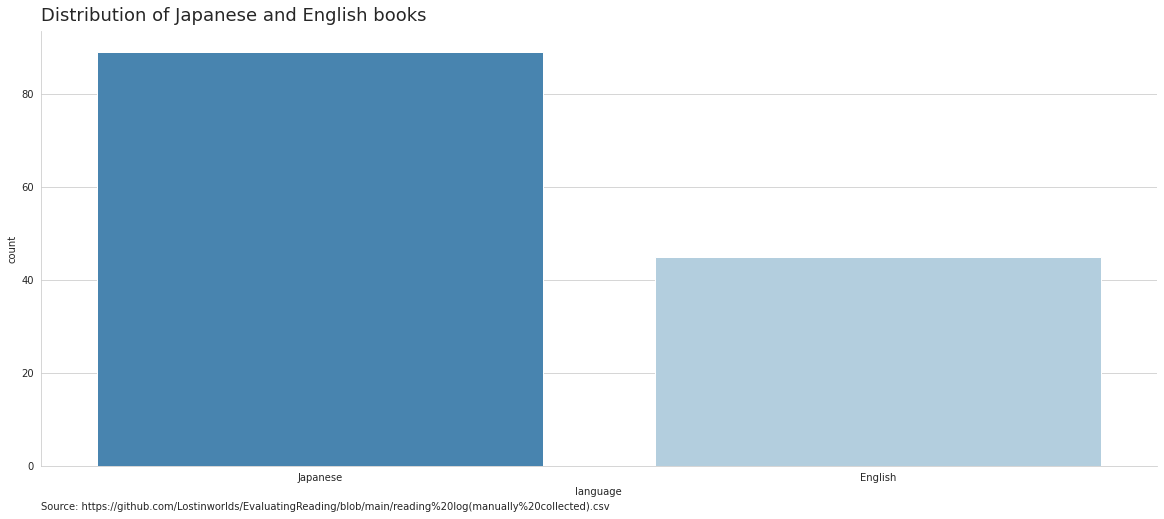

In [62]:
# language distribution of the books where more than two books by the author was read. 
# single out data
fav_authors = fav_authors[fav_authors["books/reads"]>2]

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "language", data = Completed[Completed["author(s)"].isin(fav_authors["author(s)"])], palette = "Blues_r")

# format graph
plt.title("Distribution of Japanese and English books", size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [63]:
ratio = (sum(Completed[Completed["author(s)"].isin(fav_authors["author(s)"])]["language"]=="Japanese")/Completed[Completed["author(s)"].isin(fav_authors["author(s)"])].shape[0])*100
print("There were", round(ratio,2),"% more Japanese rereads than English rereads")

There were 66.42 % more Japanese rereads than English rereads


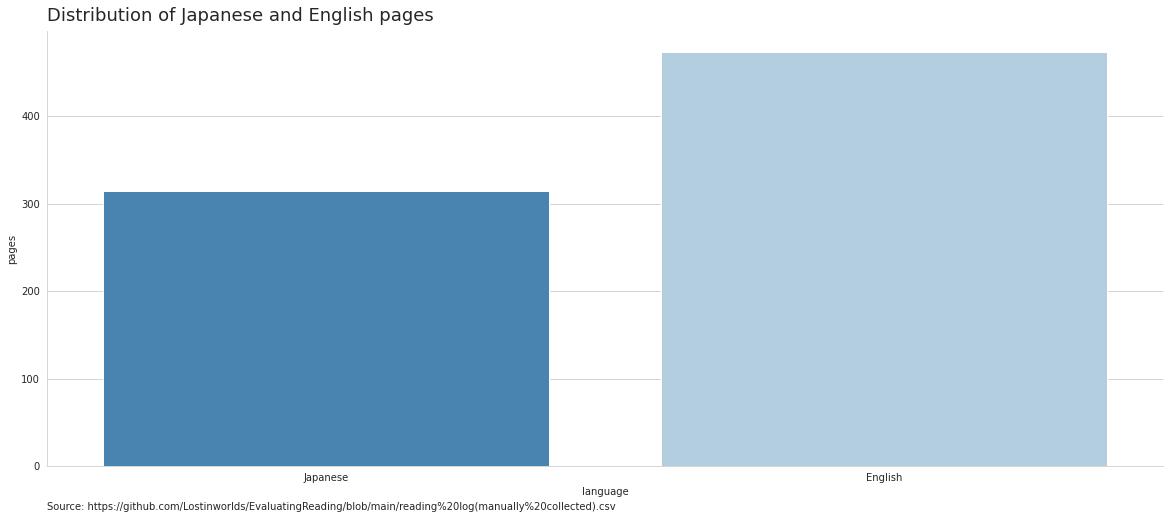

In [64]:
# where more than two books for an author was read, the visualisation of the number of pages per language read. 
# single out data 
fav_authors = fav_authors[fav_authors["books/reads"]>2]

# create graph
plt.figure(figsize = (20,8))
sns.barplot(x = "language", y = "pages", data = Completed[Completed["author(s)"].isin(fav_authors["author(s)"])], ci = None, palette = "Blues_r")

# format graph
plt.title("Distribution of Japanese and English pages",size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

The average number of pages 347 and there is a slight skew to the right as some books can be extremely long. However, the distribution of pages has aa slight skew to the right. Examining the distribution, separating out the languages, shows that distribution of English books is more dispersed and the average number of books is slightly higher than the Japanese books. The longest Japanese book also appears to be shorter than English books. These aspects are a reflection of the two culture's approach to books. Japanese novels prioritise convenience/ portability and therefore tend to be short or be split into serval parts. English books on the other hand make no such considerations and therefore can be extremely long with over 500 pages. It should perhaps be stated the size of Japanese and English books differ greatly as Japanese books are pocket size.  

In [65]:
# the spread of the number of pages and its descriptive statistic
Completed["pages"].describe()

count    328.000000
mean     345.042683
std      132.200471
min       31.000000
25%      259.750000
50%      327.000000
75%      400.000000
max      912.000000
Name: pages, dtype: float64

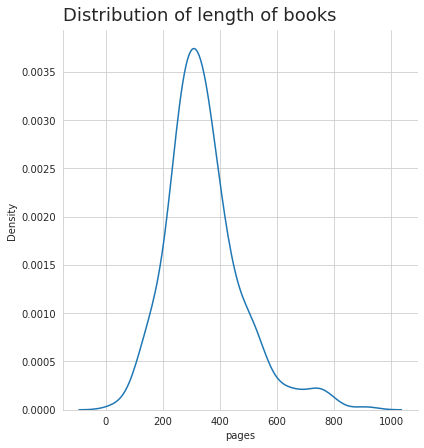

In [66]:
# distribution of the pages for books with a completion date

# create graph
sns.displot(x = "pages", data = Completed, kind= "kde", height = 6)

# format graph
plt.title("Distribution of length of books" ,size = 18, loc = "left", y = 1.01)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

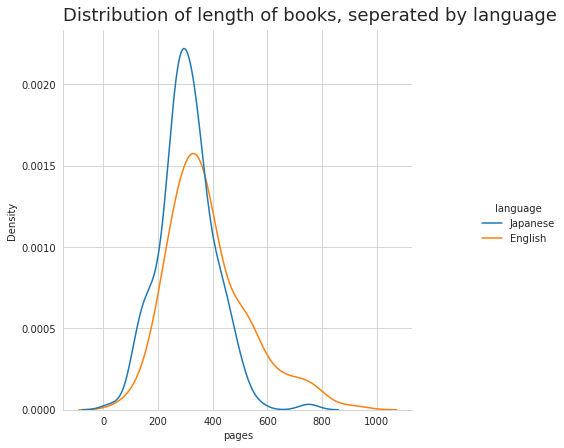

In [67]:
# distribution of the pages for books with a completion date separated by language

# create graph
sns.displot(x = "pages", data = Completed, kind= "kde", hue = "language", height = 6)

# format graph
plt.title("Distribution of length of books, seperated by language" ,size = 18, loc = "left", y = 1.01)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()


In contrast to the completed books where the completion date was unknow, when the date is known the likelihood of a book having a review increase. 75% of books in this group have a review. 

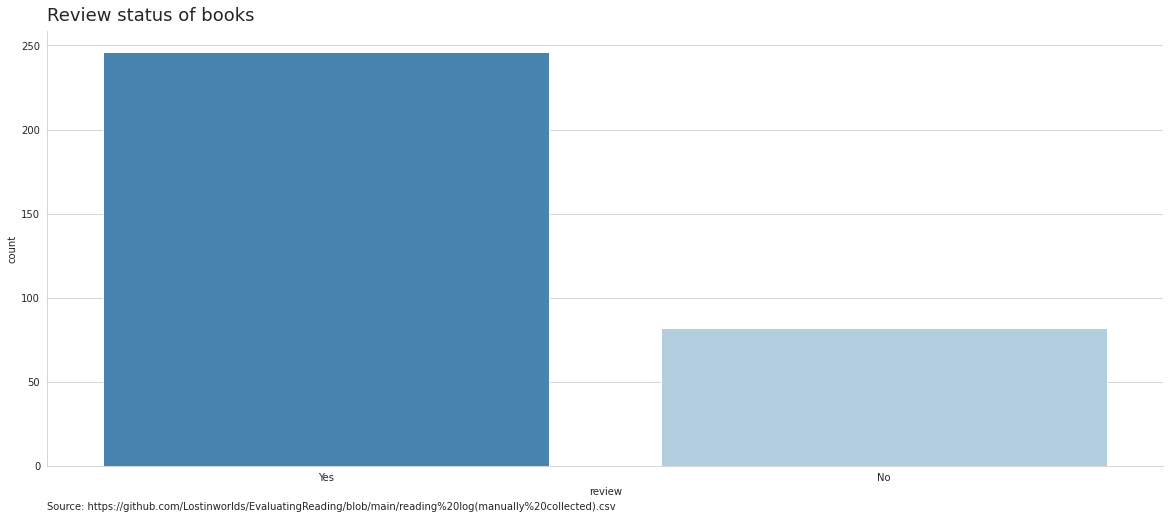

In [68]:
# ratio of reviews to no reviews for books with a known completion date

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "review", data = Completed, palette = "Blues_r")

# format graph
plt.title("Review status of books", size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [69]:
print(round((Completed[Completed["review"]=="Yes"].shape[0]/Completed.dropna(subset = ["review"]).shape[0])*100, 1) ,"% of books read have been reviewed")

75.0 % of books read have been reviewed


The rating patterns identified in the books with no completion date are also magnified in this group. The most common rating centres around 4, followed by 3 and 5 and its concentration is more pronounced.  Interestingly, the English books appear to have a more dispersed rating than Japanese books. 

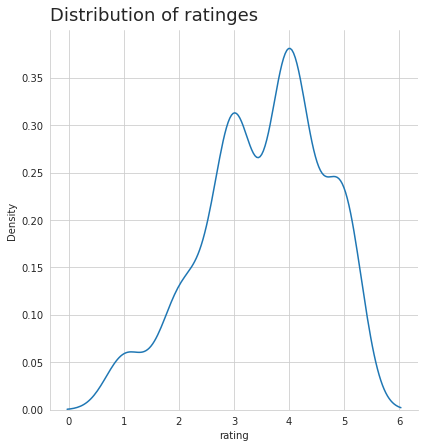

In [70]:
# distribution of the ratings for books with a known completion date

# create graph
sns.displot(x = "rating", data = Completed, kind= "kde", height = 6)

# format graph
plt.title("Distribution of ratinges",size = 18, loc = "left", y = 1.01)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

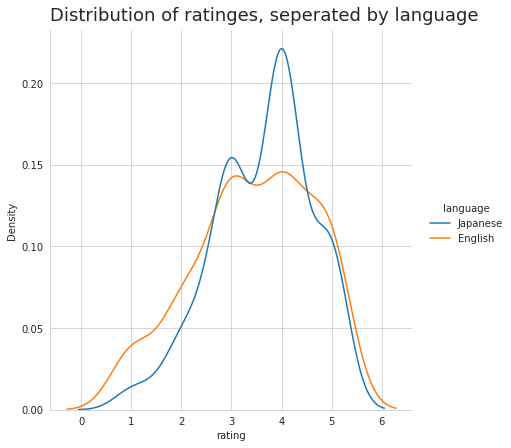

In [71]:
# distribution of the ratings for books with a known completion date with respect to language

# create graph
sns.displot(x = "rating", data = Completed, kind= "kde", hue = "language", height = 6)

# format graph
plt.title("Distribution of ratinges, seperated by language",size = 18, loc = "left", y = 1.01)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

### Format of books
Shifting the focus to how these books were consumed, it appears that the main method was via physical books followed by audiobooks. However, it should be noted that as Japanese audiobooks are limited, more of its books are consumed as physical copies compared to English books. 

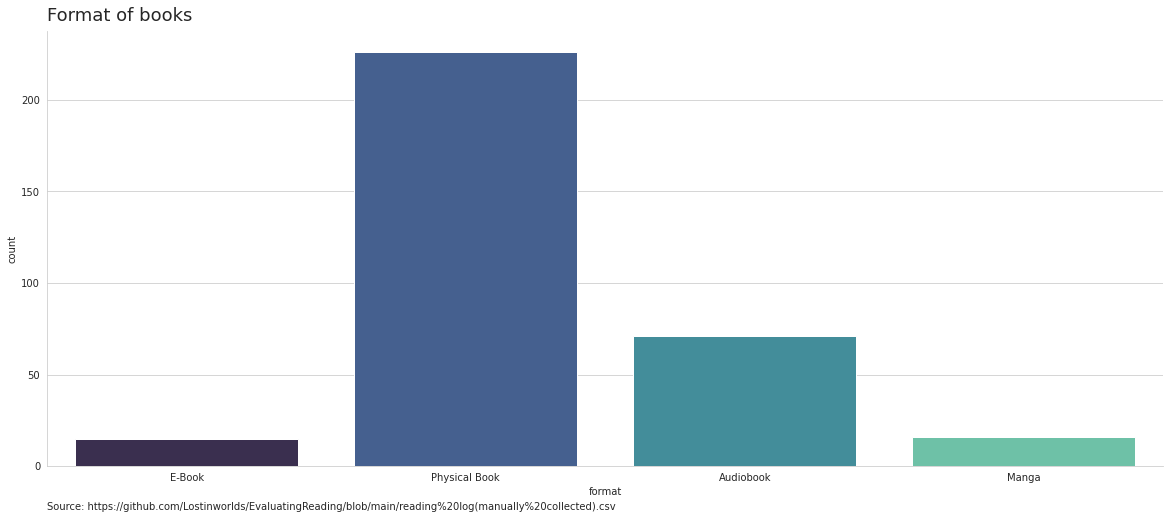

In [72]:
# distribution of the formats for books with a known completion date

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "format", data = Completed, palette = "mako")

# format graph
plt.title("Format of books", size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

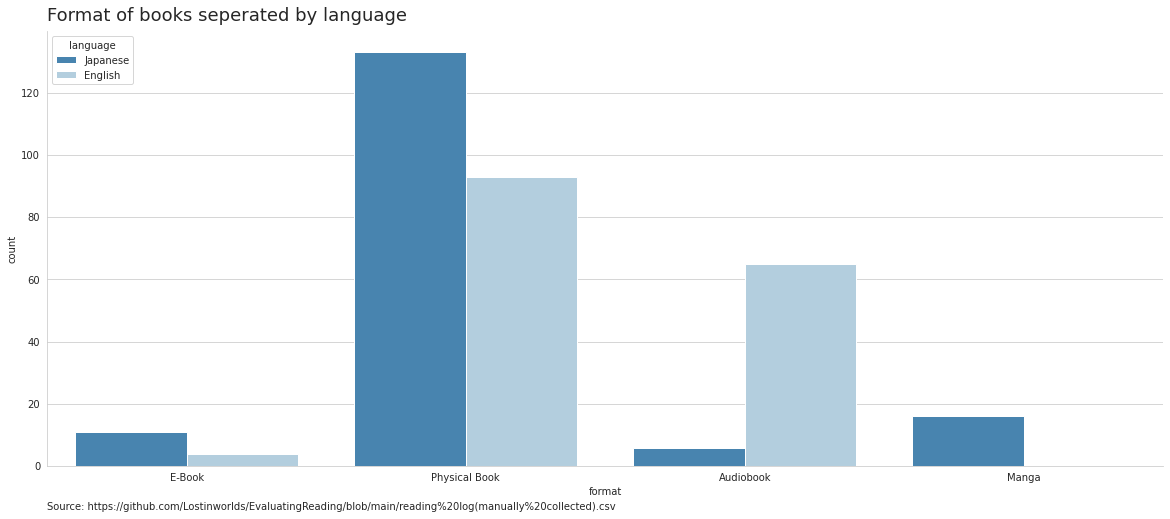

In [73]:
# distribution of the formats for books with a known completion date with respect to language

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "format", data = Completed, hue = "language", palette = "Blues_r")

# format graph
plt.title("Format of books seperated by language", size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

Looking at the trends overtime, the significance of eBooks and manga appear to be limited. In contrast, popularity of physical books have shown a downwards trend since 2020 whilst the prominence of audiobooks have increased during the period. This is due to the easy of access of audiobooks as well as the increasing cost of acquiring Japanese novels. 

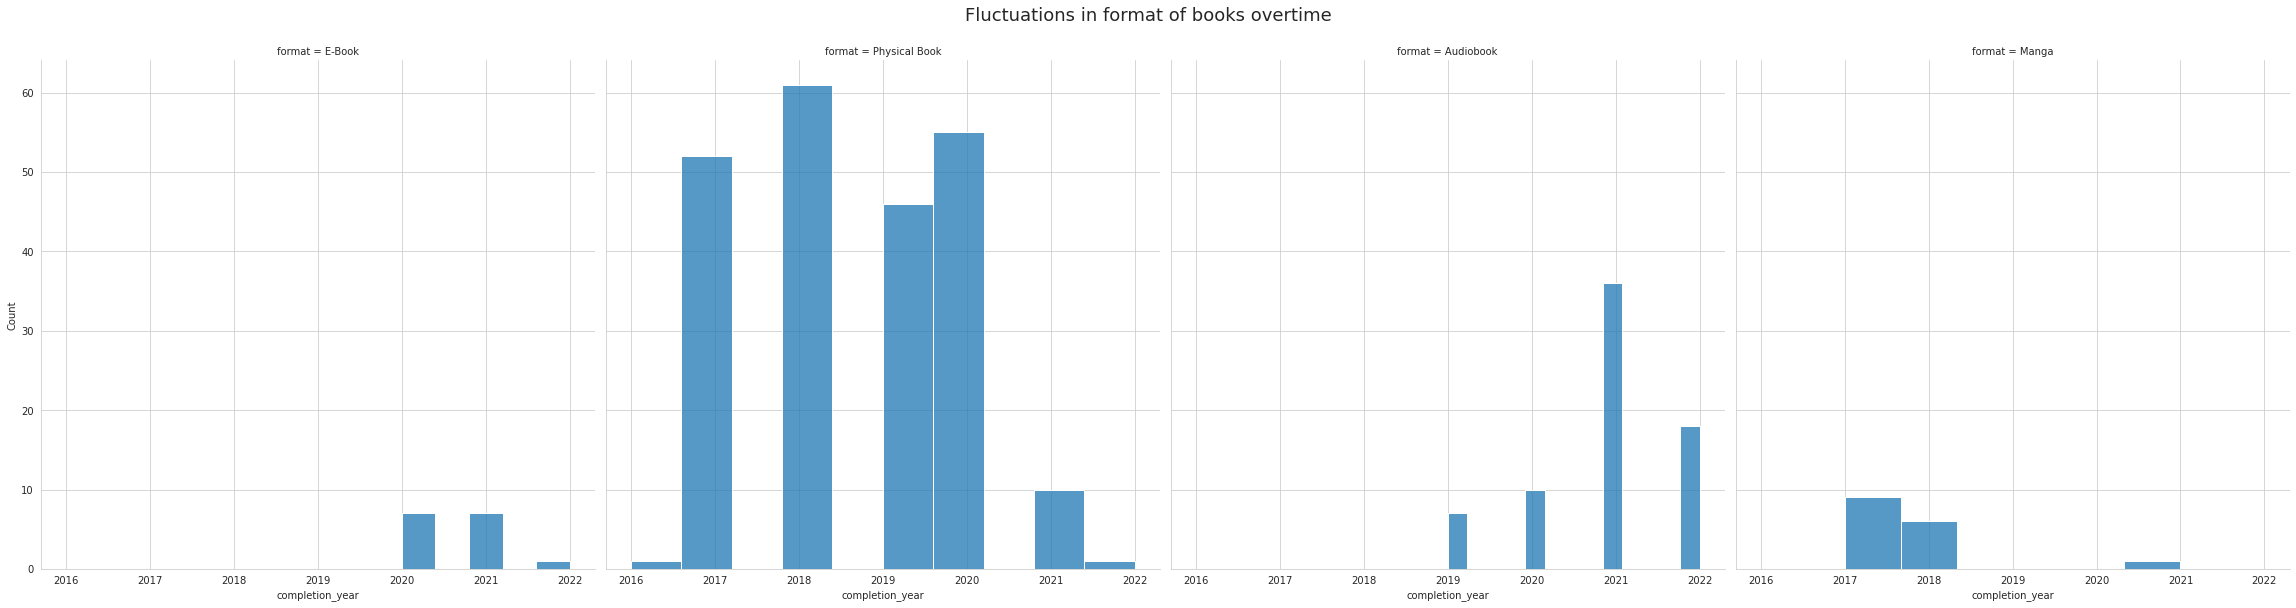

In [74]:
# changes to the format of books with a know completion date with respect to time

# create graph
g = sns.FacetGrid(Completed, col='format', height=8, )
g.map(sns.histplot, "completion_year")

# format graph
plt.suptitle("Fluctuations in format of books overtime", size = 18, y = 1.05)

plt.show()

Interestingly, since 2019, the number of non-fiction read have also increased, thus it could be informed that audiobooks are the preferred method of consuming nonfiction. 

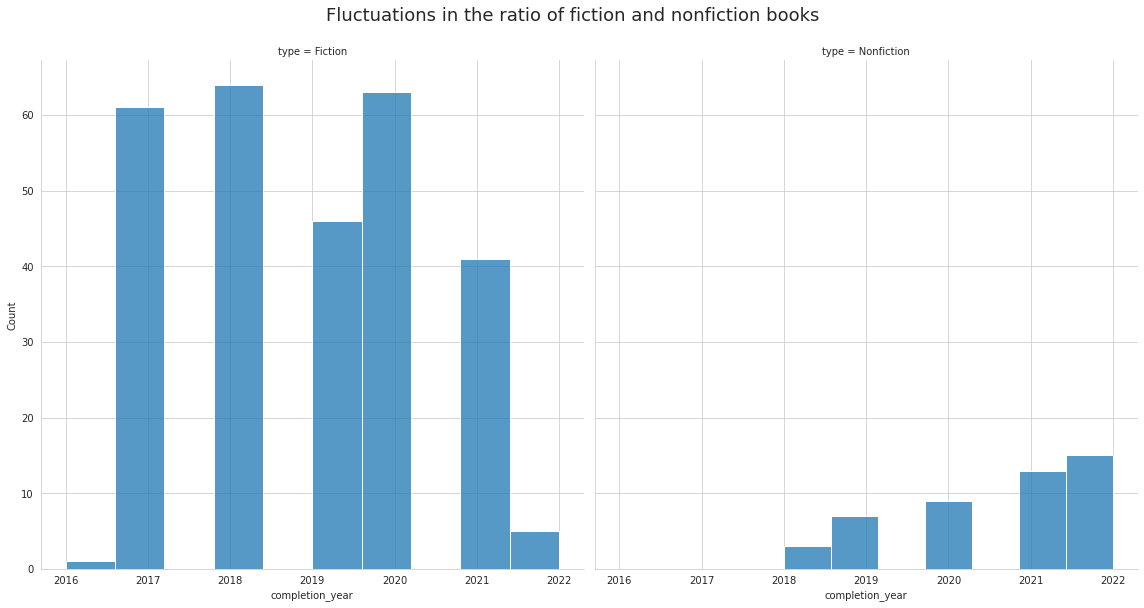

In [75]:
# changes to type for books with know completion date with respect to time

# create graph
g = sns.FacetGrid(Completed, col='type', height=8,)
g.map(sns.histplot, "completion_year")

# format graph
plt.suptitle("Fluctuations in the ratio of fiction and nonfiction books", size = 18, y = 1.05)
plt.show()

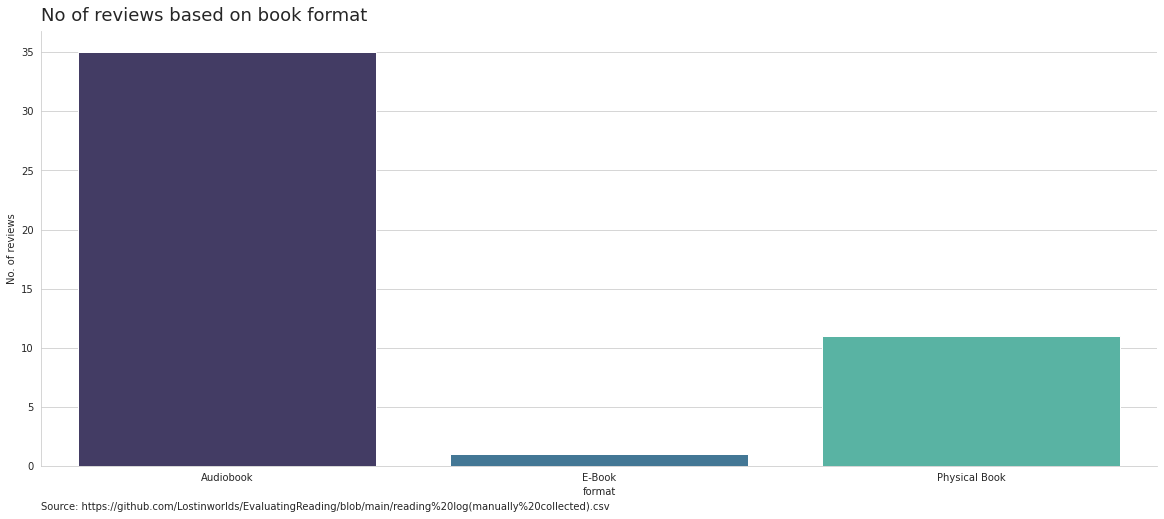

In [76]:
format_reviews = Completed[Completed["type"]=="Nonfiction"].groupby("format")["review"].size().reset_index(name="No. of reviews")

# create graph
plt.figure(figsize = (20,8))
sns.barplot(x = "format", y ="No. of reviews", data = format_reviews, palette = "mako")

# format graph
plt.title("No of reviews based on book format",  size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

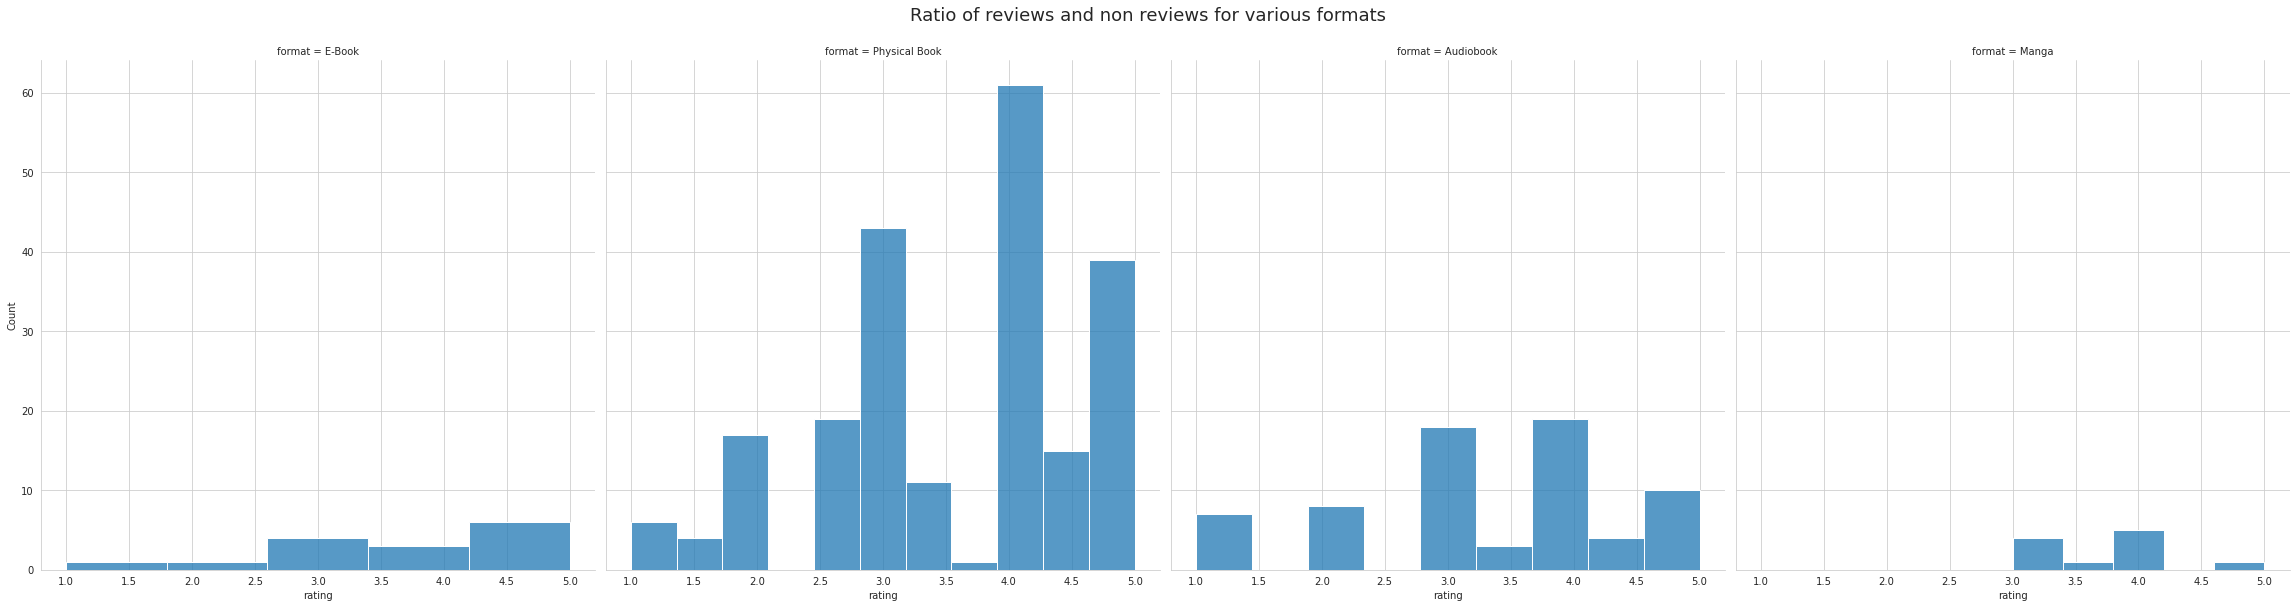

In [77]:
# create graph
g = sns.FacetGrid(Completed, col='format', height=8, )
g.map(sns.histplot, "rating")

# format graph
plt.suptitle("Ratio of reviews and non reviews for various formats",  size = 18, y = 1.05)
plt.show()

In terms of reviews, physical books are likely to garner a review amongst the 4 formats. As for ratings, each format appears to have the familiar left skew, favouring the ratings of 4-5. 

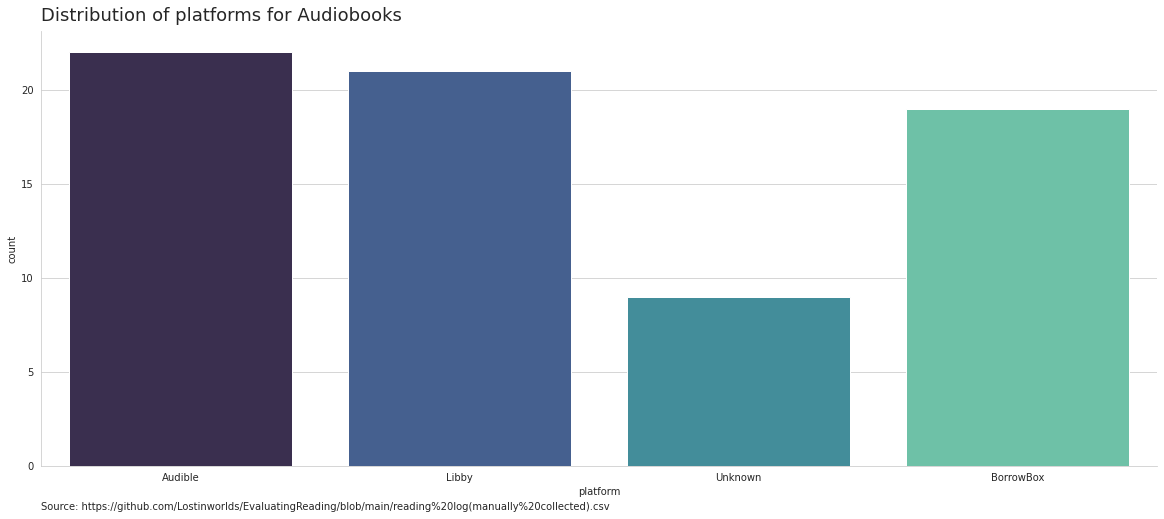

In [78]:
plt.figure(figsize = (20,8))
sns.countplot(x = "platform", data = Completed[Completed["format"]=="Audiobook"], palette = "mako")

# format graph
plt.title("Distribution of platforms for Audiobooks",  size = 18, loc = "left", y = 1.01)

plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

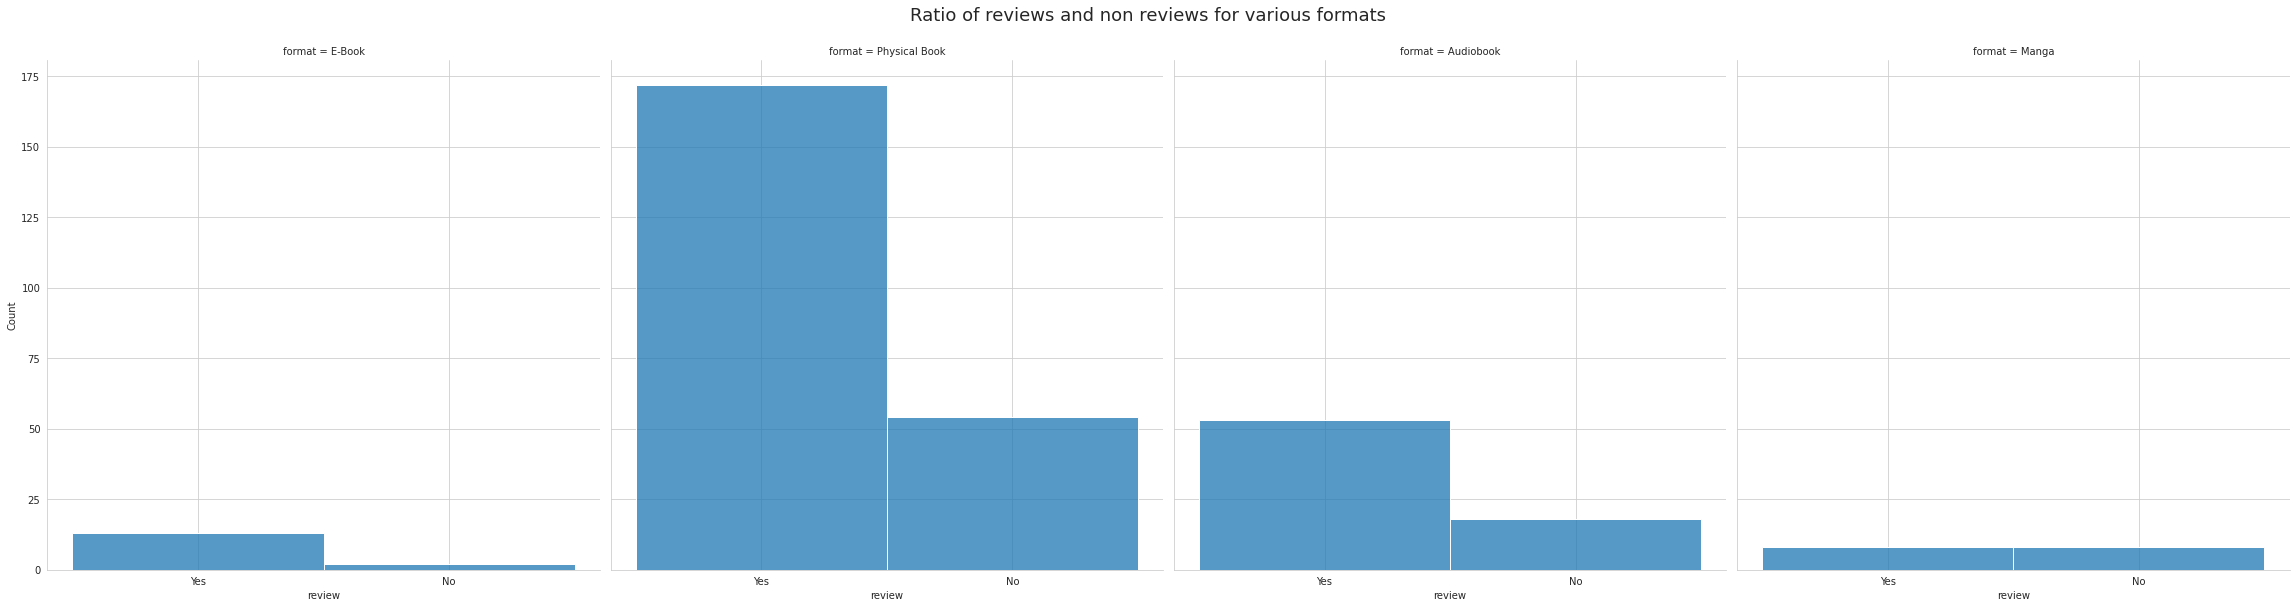

In [79]:
# distribution of reviews with respect to format for books with a known completion date

# create graph
g = sns.FacetGrid(Completed, col='format', height=8, )
g.map(sns.histplot, "review")

# format graph
plt.suptitle("Ratio of reviews and non reviews for various formats",  size = 18, y = 1.05)
plt.show()

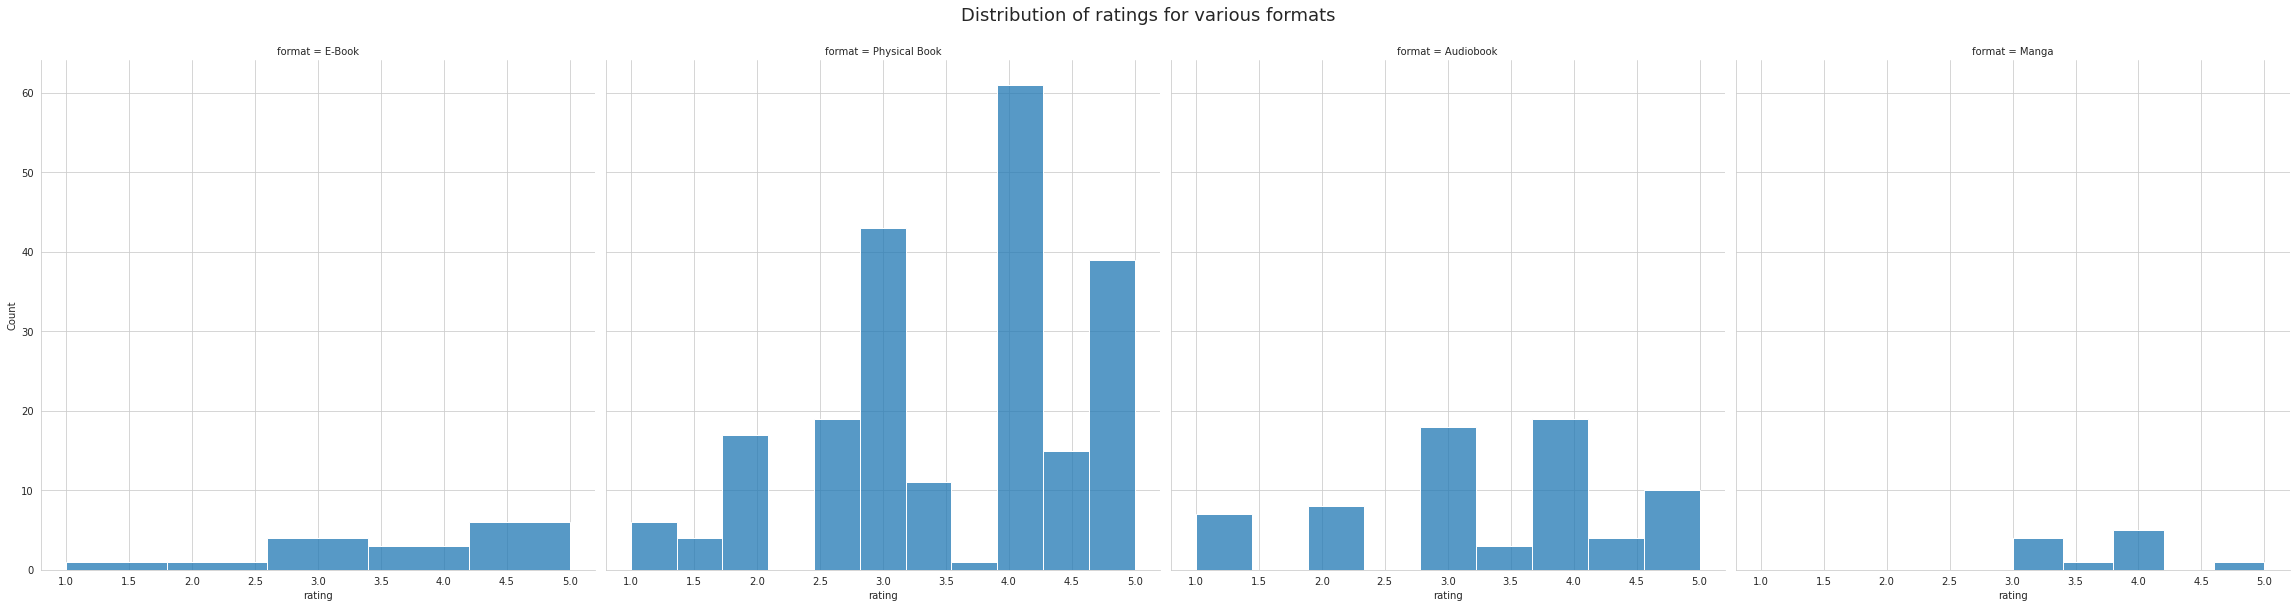

In [80]:
# distribution of ratings with respect to format for books with a known completion date

# create graph
g = sns.FacetGrid(Completed, col='format', height=8,)
g.map(sns.histplot, "rating")

# format graph
plt.suptitle("Distribution of ratings for various formats",  size = 18, y = 1.05)
plt.show()

For newer formats (E-Books and audiobooks), the platform used to consume the book can also be evaluated. Although the number of eBooks read are limited, for audiobooks, it reveals that the majority of the books were consumed via library apps, Libby and BorrowBox. However, on an individual basis, Audible is a popular platform and have gained in more prominence over the years. Audible, though costly compared to the free library apps, provide the best collection of books and no waiting list. 

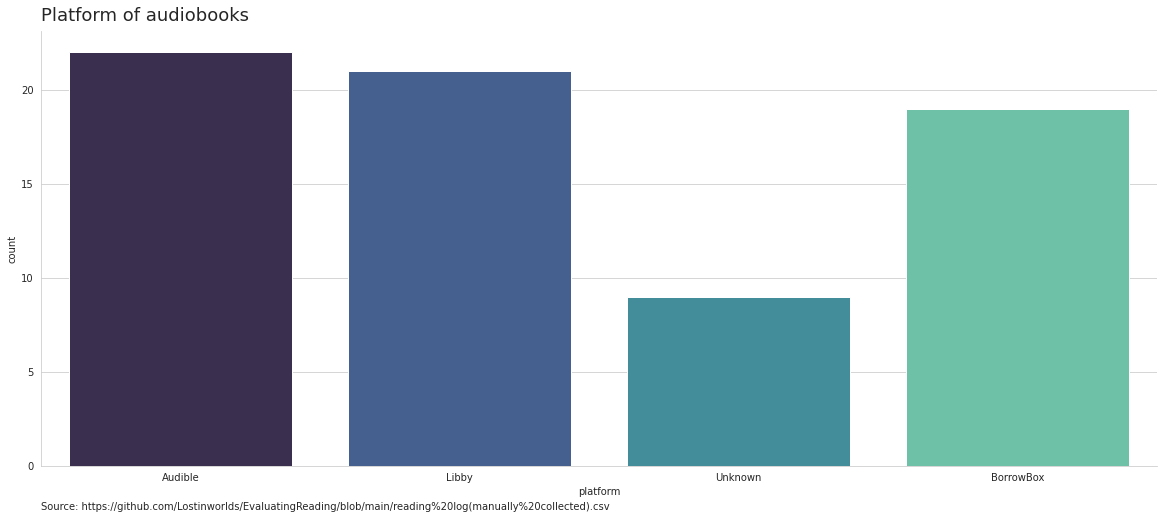

In [81]:
# consumption pattern of audiobooks for books with a known completion date

# create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "platform", data = Completed[Completed["format"]=="Audiobook"], palette = "mako")

# format graph
plt.title("Platform of audiobooks",  size = 18, loc = "left", y = 1.01)
plt.annotate('Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

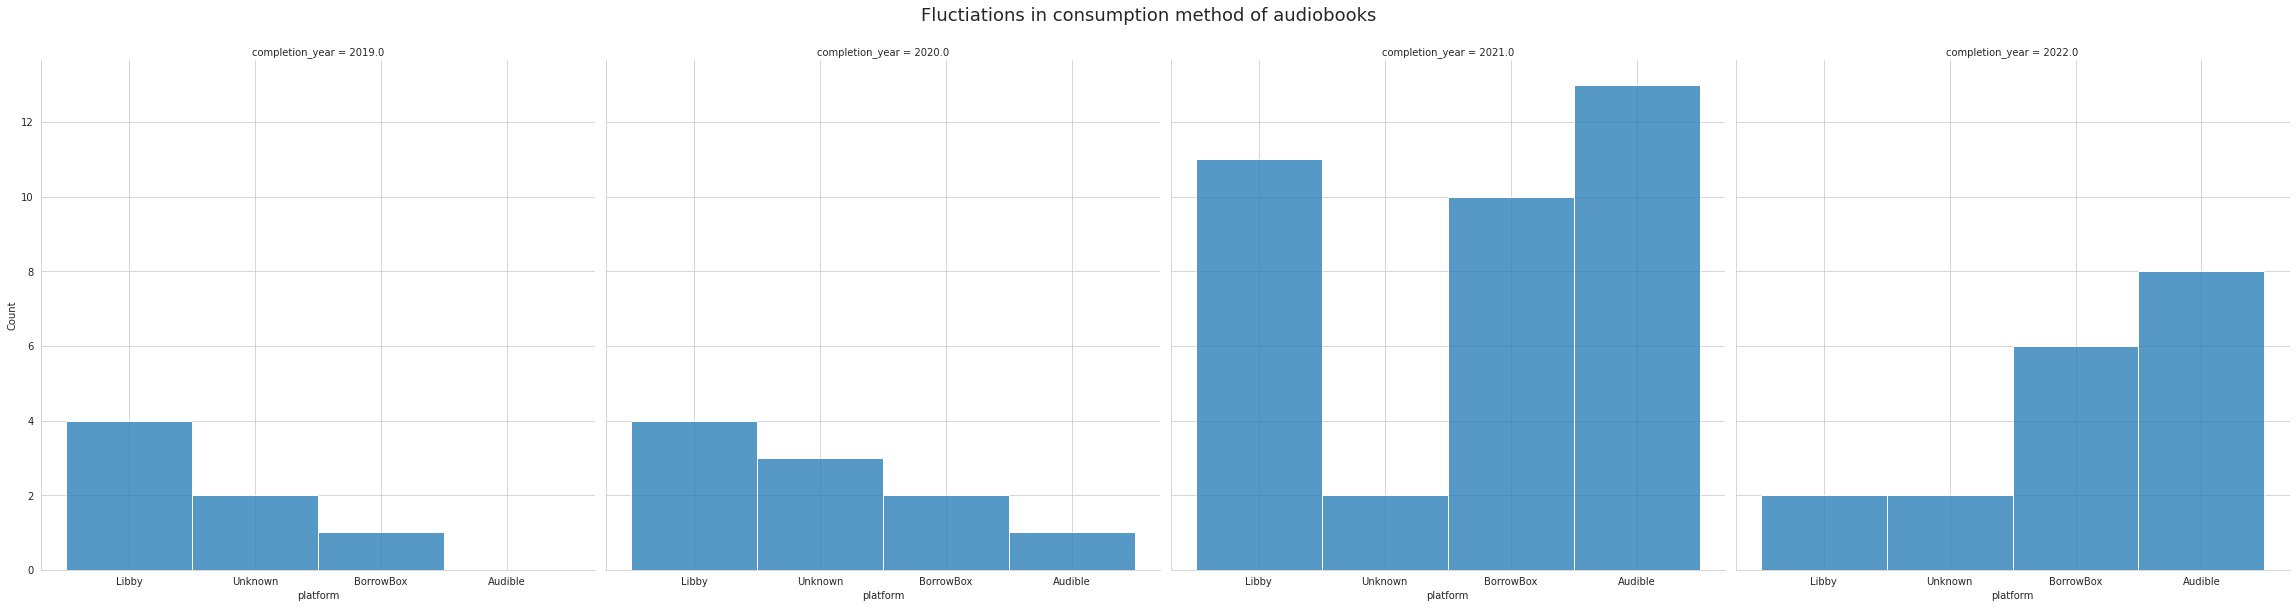

In [82]:
# fluctuations over time in the consumption patterns of audiobooks for books with a known completion date

# create graph
g = sns.FacetGrid(Completed[Completed["format"]=="Audiobook"], col='completion_year', height=8)
g.map(sns.histplot, "platform")

# format graph
plt.suptitle("Fluctiations in consumption method of audiobooks", size = 18, y= 1.05)
plt.show()

Excluding any rereads, there are 56 and 114 imprints. Some publishers will use different imprints based on the type of book and audience. The publisher Penguin Random House (English books) is the most popular publisher with 55 books followed by Kadokawa (Japanese books) with 52 books. After these two publishers, there is a drop in the number of books representing other the publishers. 
In terms of imprints, Japanese books appear to favour specific imprints whilst for English books the preference of imprints are more dispersed. Further examination will be needed before a cause of these differences can be explained. 

In [83]:
print("There are",first_reads["publisher"].nunique(),"publishers and", first_reads["Imprint"].nunique(), "imprints for each unique book.")

There are 56 publishers and 114 imprints for each unique book.


In [84]:
# mos popular publishers
publisher = first_reads["publisher"].value_counts().rename_axis ("publisher").reset_index(name = "books/reads")
publisher[publisher["books/reads"]>1].head(10)

,publisher,books/reads
0,Penguin Random House,55
1,KADOKAWA,52
2,集英社,23
3,講談社,22
4,HarperCollins,17
5,Macmillan Publishers,17
6,文藝春秋,13
7,Orion,12
8,新潮社,9
9,Hachette Book,9


In [85]:
# most popular imprints 
Imprint = first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,20
1,講談社文庫,18
2,コバルト文庫,15
3,Penguin,13
4,文春文庫,13
5,Penguin Classics,13
6,メディアワークス文庫,11
7,Picador,9
8,角川ホラー文庫,8
9,Gollancz,7


In [86]:
Japanese_first_reads = first_reads[first_reads["language"]=="Japanese"]
Imprint = Japanese_first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
print("There are", Imprint["Imprint"].nunique(),"imprints in the books consumed in Japanese.")

There are 43 imprints in the books consumed in Japanese.


In [87]:
# most popular imprints for Japanese books
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,20
1,講談社文庫,18
2,コバルト文庫,15
3,文春文庫,13
4,メディアワークス文庫,11
5,角川ホラー文庫,8
6,一迅社,6
7,新潮文庫,6
8,アスキーメディアワークス,5
9,光文社文庫,5


In [88]:
English_first_reads = first_reads[first_reads["language"]=="English"]
Imprint = English_first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
print("There are", Imprint["Imprint"].nunique(),"imprints in the books consumed in English.")

There are 72 imprints in the books consumed in English.


In [89]:
# most popular imprints for English books
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,Penguin,13
1,Penguin Classics,12
2,Picador,9
3,Gollancz,7
4,Vintage Classics,6
5,HarperCollins,6
6,Wordsworth Editions,5
7,Orion Children's Books,5
8,Vintage,4
9,Black Swan,4


In [90]:
# distribution of genres for books with a known completion date

# create graph
fig = px.histogram( Completed, x = "genre", title = "Distribution of genres")

# format graph
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

In [91]:
# distribution of genres for Japanese books with a known completion date

# create graph
fig = px.histogram( Completed[Completed["language"]=="Japanese"], x = "genre", title = "Distrubution of genres for Japanese books")

# format graph
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")


In [92]:
# distribution of genres for English books with a known completion date
fig = px.histogram( Completed[Completed["language"]=="English"], x = "genre", title = "Distrubution of genres for English books")

# format graph
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")


# Favourites and other limitations 
In previous sections, the variations in the number of books and pages was touched upon as well as the inclusion of manga and general books. However, there are some caveats that should be mentioned, namely specific authors and genres have a tendency of favouring series over standalone novels.

*Can it really be inferred that a reader prefers an author or genre based on sole the page count or the number of books?*

For example, fantasy novels are typically long as it involves a greater degree of world building over contemporary romances. In this case, favouring page counts will negatively impact contemporary novels. Likewise, as Japanese novels cap the length of a book, page count cannot fully decipher a preference towards a genre or author. 

Likewise, series has an impact on the books which are read. In a series the likelihood of a second book being consumed by a reader is not the same as that of a separate standalone. Therefore, concluding that an individual likes all books by JK Rowling because they have read every Harry Potter book may be inaccurate. 

Finally not all authors have the same number of books published. Some authors such as Brandon Sanderson and Stephen King publish countless books. In contrast, Jane Austen and the Bronte sisters published a limited number of books in their life time. Subsequently counting number of books will negatively impact these authors even if the reader prefers such authors. 

# Conclusion
This was a long project with many frustrations. In my experience, books and the data surrounding them contain extremely messy and convoluted data with no standardised recording especially internationally with the exception of ISBN. ISBN, however, is in itself extremely difficult to collate. 
 
Having said that, it can also be insightful to passionate readers and bibliophiles. For me, it was clear that COVID had indeed changed my reading habits with a increasing reliance on audiobooks. In addition, as a goal oriented individual, having a goal of 52books ensures that when interest shifts in the summer months, it can be brought back. However as the page and book counts indicate, completing 52 books can take many shapes and takes no account of the length of any books.  

Finally, whilst this was a personal project based on my curiosity, it should be acknowledged that I am by no means alone. The site I use, Bookmeter, offers a limited data visualisation and sites such as Storygraph are also growing in prominence, indicating an appetite for data analytics. In addition, a more effective analytics may lead to a more catered recommendations. 

Finally, I am still at the early stages of data science and analytics. However, the challenges faced when using non-English characters were surprising. It was a reminder of the importance of diversity in ensuring the whole world benefits from data science. 
